# NAIVE BAYES

# LOAD THE DEPENDANCIES

## Pandas


In [1]:
import pandas as pd
from pandas import set_option
from pandas.plotting import scatter_matrix

## Numpy

In [2]:
import numpy as np
from numpy import set_printoptions

## Matplotlib & Seaborn

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set()
import graphviz

## sklearn

In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA 
from sklearn.manifold import Isomap

C:\Users\Public\Programming\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Math & statistics

In [5]:
from scipy import stats
from scipy.stats import norm
import math

## System

In [6]:
import os
import sys
import pprint
sys.path.insert(0, "C:\\Users\\Crystal\\Desktop\\Programs\\my-modules-and-libraries")
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

## notebook widgets

In [7]:
import ipywidgets as widgets
from IPython.display import Image
from IPython.display import display, Math, Latex
from IPython.core.interactiveshell import InteractiveShell  
InteractiveShell.ast_node_interactivity = "all"

# FUNCTIONS

## Label Encoding

In [8]:
def label_encoding(dataset,input_headers):
    
    for i in input_headers:
        
        the_data_type=dataset[i].dtype.name
        if (the_data_type=='object'):
            lable_enc=preprocessing.LabelEncoder()
            lable_enc.fit(dataset[i])
            labels=lable_enc.classes_   #this is an array
            labels=list(labels) #converting the labels array to a list
            print(labels)
            dataset[i]=lable_enc.transform(dataset[i])

            return labels
    
        else:
            c=list(np.unique(dataset[i]))
            return [str(x) for x in c]

## Feature Scaling

In [9]:
def feature_scaling(X_train,X_test):
    sc_X=StandardScaler()
    X_train=sc_X.fit_transform(X=X_train,y=None)
    X_test=sc_X.fit_transform(X=X_test,y=None)

    print(sc_X.fit(X_train))
    print(X_train[0:5])
    
    
    
    return X_train, X_test

## Visualization

### Plot the data space (scatter)

In [10]:
def plot_of_data_space(dataset,data,labels,input_headers):
    
    
    xx_1=pd.DataFrame(data[:,0]) 
    xx_2=pd.DataFrame(data[:,1]) 
    y=pd.DataFrame(labels)
    
   
    plt.figure(figsize=(15,10)) 
    b=plt.scatter(xx_1[y==0],xx_2[y==0],color='b') 
    r=plt.scatter(xx_1[y==1],xx_2[y==1],color='r')
    g=plt.scatter(xx_1[y==2],xx_2[y==2],color='g') 
    bl=plt.scatter(xx_1[y==3],xx_2[y==3],color='black')
    
    
#     for i in range(0,len(xx_1)):
#         print(y[i])
#         if (y[i]==0):
#             a=plt.scatter(xx_1[i],xx_2[i],marker='o',color='blue',s=30)
#         if (y[i]==1):
#             b=plt.scatter(xx_1[i],xx_2[i],marker='o',color='red',s=30)
#         if (y[i]==2):
#             c=plt.scatter(xx_1[i],xx_2[i],marker='o',color='green',s=30)
#         if (y[i]==3):
#             d=plt.scatter(xx_1[i],xx_2[i],marker='o',color='black',s=30)
        
#     plt.xlabel(f1);plt.ylabel(f2);
#     plt.legend((a,b),tuple(np.unique(labels)))

    plt.xlabel(input_headers[0])
    plt.ylabel(input_headers[1])

    plt.grid()
    plt.legend((b,r,g,bl),tuple(np.unique(labels)))
    plt.show()


### Feature Distributions (histograms)

In [11]:
def feature_distributions(df,target_header,*args):
    
    
    data=df.drop(target_header,axis=1,inplace=False)

    num_plot_rows=len(data.columns)

    print (classes)
    
    label_encoder = preprocessing.LabelEncoder()
    df[target_header]=label_encoder.fit_transform(df[target_header])
    labels=label_encoder.classes_   #this is an array
    labels=list(labels) #converting the labels array to a list
    print (labels)

    fig = plt.figure(figsize = (20,num_plot_rows*4))
    j = 0

    ax=[]
    colors=['b','r','g','black']
    for i in data.columns:
        plt.subplot(num_plot_rows, 4, j+1)
        j += 1
        for k in range(len(labels)):
    #         print(k)
            a=sns.distplot(data[i][df[target_header]==k], color=colors[k], label = str(labels[k])+classes[k]);
            ax.append(a)
        plt.legend(loc='best')
    
    fig.suptitle(target_header+ ' Data Analysis')
    fig.tight_layout()
    # fig.subplots_adjust(top=0.95)
    plt.show()

## Preprocessing: Splitting the dataset

In [12]:


def split_the_dataset(dataset,input_headers,target_header):
    
    X=dataset[input_headers]
    y=dataset[target_header]
    
    X.head()
    
    return X,y





## Replacing Zeros

In [13]:
def replacing_zeros(dataset,the_headers):
    """Function used to remove zeros from numeric features when 0 is not practical"""

    for header in the_headers:
        dataset[header]=dataset[header].replace(0,np.nan)
        mean=int(dataset[header].mean(skipna=True))
        dataset[header]=dataset[header].replace(np.nan,mean)
        
    return dataset

## Feature Correlations

In [14]:
def correlation_matrix(dataset,input_headers,target_header):
    
    feature_matrix=dataset[input_headers]
    corr=feature_matrix.corr()
    corr
    
    plt.figure(figsize=(10,10))
    corr_plot=sns.heatmap(corr,cmap="Reds",annot=True)
    
    corr_pair=sns.pairplot(dataset,hue=target_header[0])
    plt.show()
    
    return corr,corr_plot,corr_pair 
   

## Drop Unwanted Features

In [15]:
def feature_drop(dataset,headers_to_drop):
    
    dataset.drop(labels=headers_to_drop,axis=1,inplace=True)
    dataset.head()

## Principal Component Analysis (PCA)

In [16]:


def pca(dataset,input_headers,target_header,*args):
    
    feature_matrix=dataset[input_headers]
    model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
    model.fit(feature_matrix)  # 3. Fit to data. Notice y is not specified!
    X_2D = model.transform(feature_matrix)         # 4. Transform the data to two dimensions


    dataset['PCA1'] = X_2D[:, 0]
    dataset['PCA2'] = X_2D[:, 1]

    sns.lmplot("PCA1", "PCA2", hue=target_header[0], data=dataset, fit_reg=False);
    
    
#     sns.distplot(dataset['PCA1'][dataset[target_header[0]]==0], color='b', label = '0')
#     sns.distplot(dataset['PCA1'][dataset[target_header[0]]==1], color='r', label = '1')
#     # sns.distplot(df['PCA1'][df[target_header]==2], color='r', label = '2')
#     plt.legend(loc='best')
#     plt.show()

# MAIN PROGRAM

## Get Data

In [17]:
if __name__ == "__main__":
    
    
    location=r'C:/Users/Crystal/Desktop/Programs/dataset_repo/iris_/iris_data.csv'
#     location=r'C:\Users\Crystal\Desktop\Programs\dataset_repo\CDH_Train.csv'
#     location=r'C:/Users/Crystal/Desktop/Programs/dataset_repo/0529_/0529_pass_rush.csv'
    dataset=pd.read_csv(location)
    # df=pd.read_csv('thermostat_dataset.txt',delimiter='\t')

    dataset.info()
    dataset.head() 
    dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Drop unwanted features (columns)

In [ ]:
drop_columns=['Id']
if (drop_columns!=[]):
    q1=input('Do you need to drop any columns in the dataset?')
    if (q1.lower()=='y'):
        feature_drop(dataset,drop_columns)

## Selecting inputs and targets

In [18]:
#     target_header=['Species']
#     input_headers=['Length','Width']
    
#     target_header=['Survived']
#     input_headers=['Parch','Fare','SibSp','Age','Pclass','Sex','Ticket']

# target_header=['play_type']
# input_headers=['down','ydstogo','game_seconds_remaining']
# input_headers=['score_differential','game_seconds_remaining','yardline_100','qtr']

target_header=['Species']
input_headers=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']

target_label=label_encoding(dataset,target_header)

classes=target_label
print (classes)
test_label=label_encoding(dataset,input_headers)
#     print(test_label)
#     print(dataset[['Sex','Ticket']])

dataset=dataset[input_headers+target_header]
X,y=split_the_dataset(dataset,input_headers,target_header)

print(X.head())

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2


## Replace zeros with the mean where needed.

In [19]:
rz=input('Do you need to replace any zeros in the dataset?')
if (rz.lower()=='y'):
    the_headers=['Age','Glucose','BloodPressure','SkinThickness','Insulin','BMI']
    dataset=replacing_zeros(dataset,the_headers)
    dataset.head()

Do you need to replace any zeros in the dataset?


## Data Visualizations

### Data space

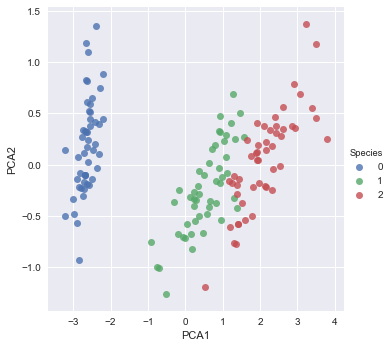

In [20]:
if (X.values.shape[1]==2):
    plot_of_data_space(dataset,X.values,y.values,input_headers)
else:
    pca(dataset,input_headers,target_header)

In [21]:
target_header[0]

'Species'

### Feature distributions

In [22]:
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,PCA1,PCA2
0,5.1,3.5,1.4,0.2,0,-2.684207,0.326607
1,4.9,3.0,1.4,0.2,0,-2.715391,-0.169557
2,4.7,3.2,1.3,0.2,0,-2.889820,-0.137346
3,4.6,3.1,1.5,0.2,0,-2.746437,-0.311124
4,5.0,3.6,1.4,0.2,0,-2.728593,0.333925


['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
[0, 1, 2]


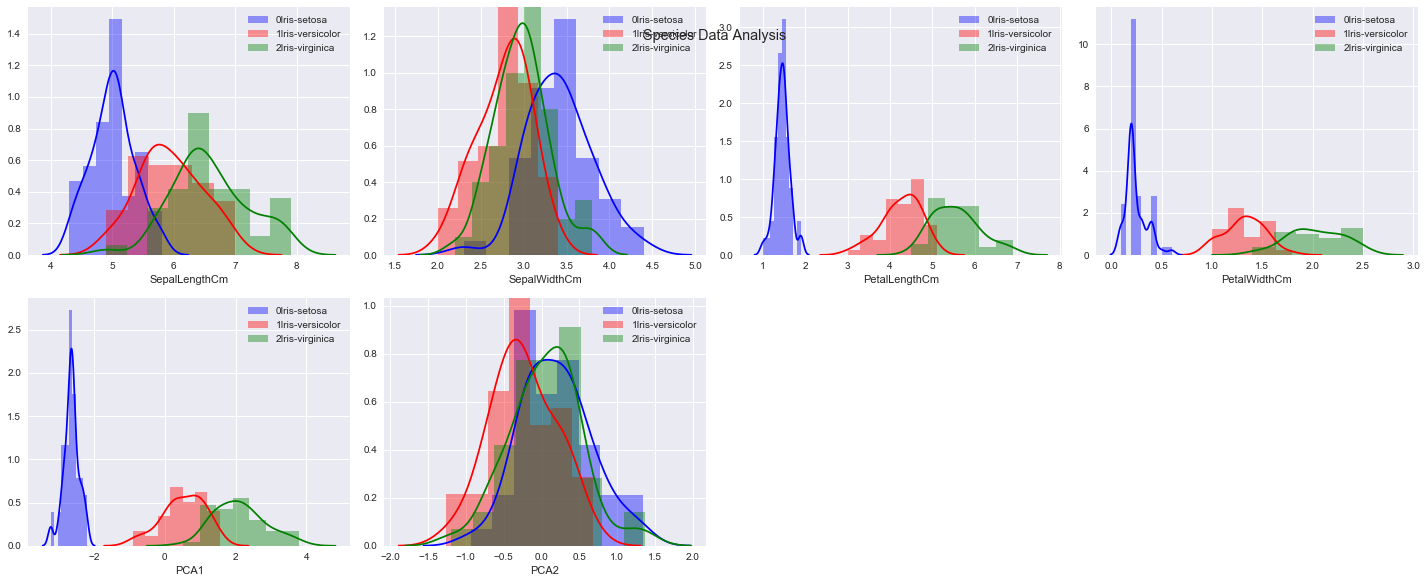

In [23]:
feature_distributions(dataset,target_header[0],classes)

In [24]:
    X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Correlation Matrix

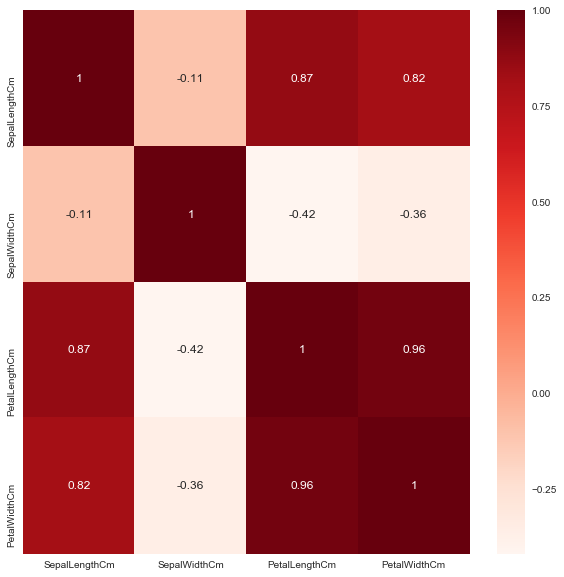

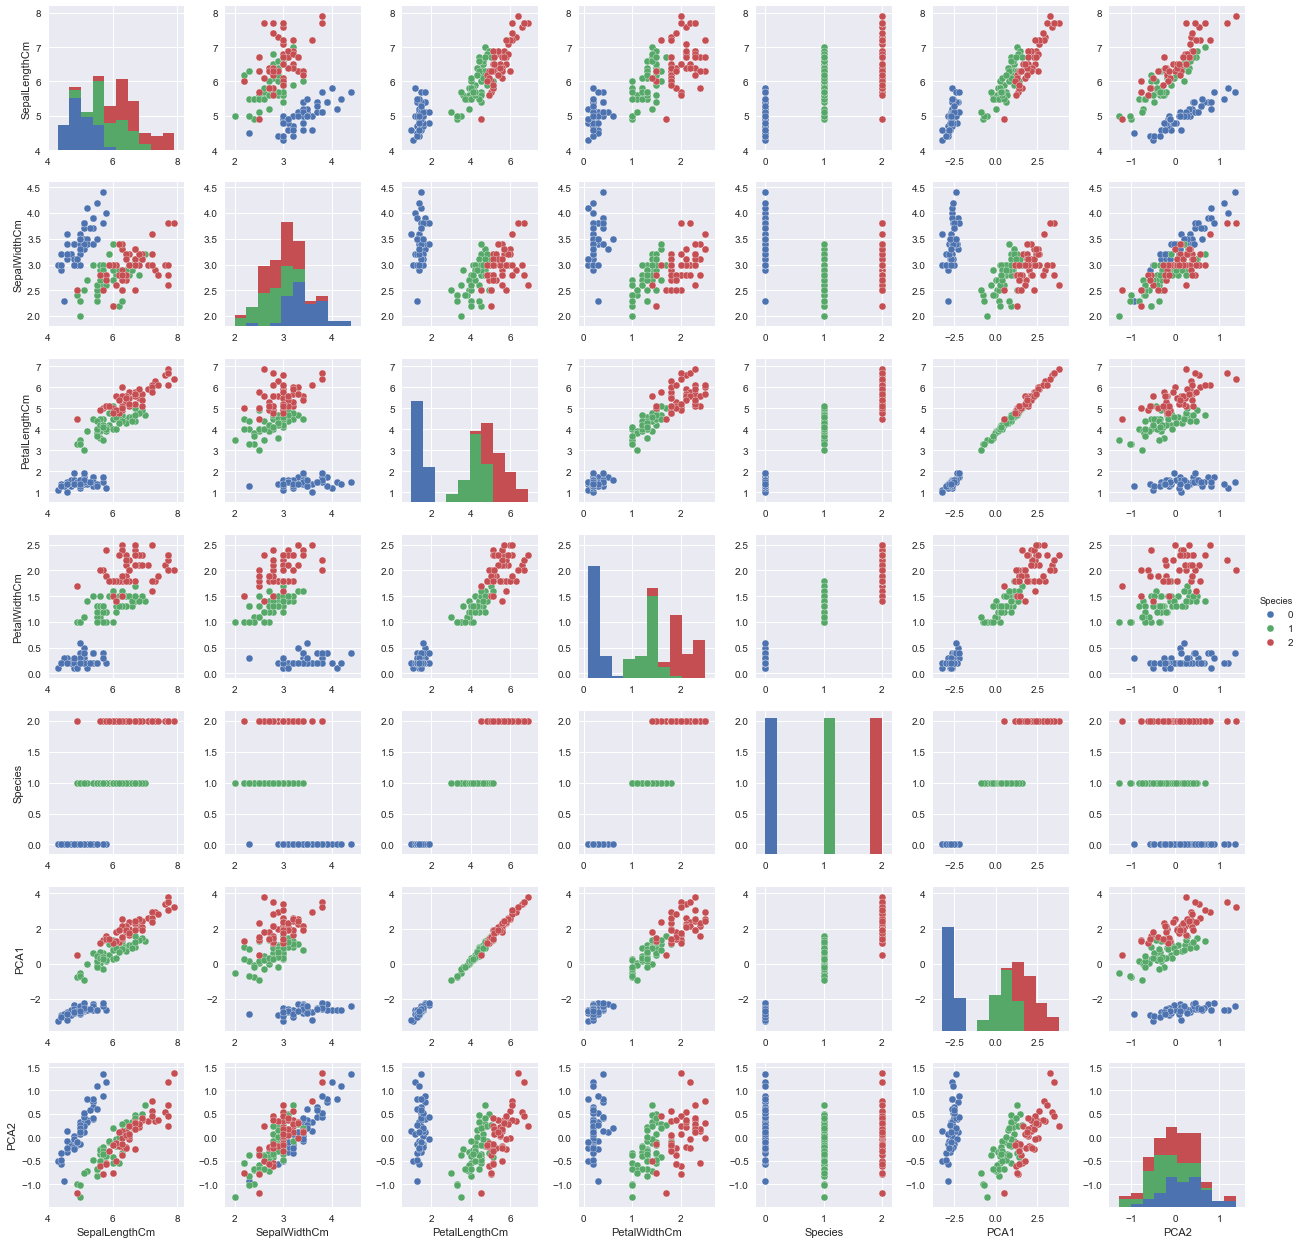

(               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
 SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
 SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
 PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
 PetalWidthCm        0.817954     -0.356544       0.962757      1.000000,
 <seaborn.axisgrid.PairGrid at 0xc6eff60>)

In [25]:
correlation_matrix(dataset,input_headers,target_header)

In [26]:
y.head()

,Species
0,0
1,0
2,0
3,0
4,0


## Splitting the Train-Test data

In [27]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=.20)

In [28]:
ytest.shape

(30, 1)

## Scale the data

In [29]:
#Scale the data    
Xtrain, Xtest=feature_scaling(Xtrain,Xtest)


StandardScaler(copy=True, with_mean=True, with_std=True)
[[-0.70937639  1.00167313 -1.20689521 -1.23945349]
 [ 2.21337612 -0.18373886  1.69991262  1.28597453]
 [ 0.63021851 -1.36915085  0.78797291  1.02014   ]
 [ 0.3866558  -0.18373886  0.55998798  0.35555368]
 [ 1.36090664  0.29042594  1.18694653  1.55180906]]


In [30]:
ytest.head()

,Species
119,2
113,2
10,0
15,0
101,2


## Naive Bayes Model

In [31]:
model = GaussianNB(priors=None)

## Fit model to training data

In [32]:
model.fit(Xtrain,ytrain)

C:\Users\Public\Programming\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None)

## Model prediction on test data

In [33]:
y_model=model.predict(Xtest)
y_model

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 2, 0, 2, 1, 0, 1, 0, 0, 1, 1, 1, 2,
       2, 2, 1, 2, 1, 2, 1, 1], dtype=int64)

## Model score & performance

In [34]:
accuracy_score(ytest,y_model)

0.8

In [35]:
recall_score(ytest, y_model,average=None)

array([1.        , 1.        , 0.57142857])

In [36]:
precision_score(ytest, y_model,average=None)

array([1.   , 0.625, 1.   ])

### Confusion Matrix

In [37]:
cm=confusion_matrix(ytest, y_model)

In [38]:
cm

array([[ 6,  0,  0],
       [ 0, 10,  0],
       [ 0,  6,  8]], dtype=int64)

[[<matplotlib.axis.YTick at 0x1016b080>,
 [Text(0,0,'Iris-setosa'),
  Text(0,0,'Iris-versicolor'),
  Text(0,0,'Iris-virginica')],
 Text(0,0.5,'True label'),
 [Text(0,0,'Iris-setosa'),
  Text(0,0,'Iris-versicolor'),
  Text(0,0,'Iris-virginica')],
 Text(0.5,0,'Predicted label'),
 Text(0.5,1,'confusion')]

Text(0,0,'6')

Text(1,0,'0')

Text(2,0,'0')

Text(0,1,'0')

Text(1,1,'10')

Text(2,1,'0')

Text(0,2,'0')

Text(1,2,'6')

Text(2,2,'8')

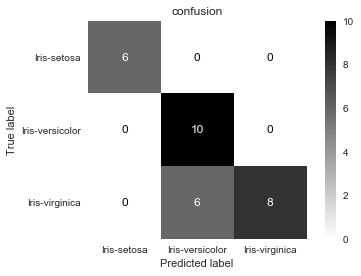

In [39]:
fig, ax = plt.subplots()
cmap=plt.cm.binary
im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
ax.figure.colorbar(im, ax=ax)

ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes,
       yticklabels=classes,
       title="confusion",
       ylabel='True label',
       xlabel='Predicted label')



# Loop over data dimensions and create text annotations.
normalize=False
fmt = '.2f' if normalize else 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()

plt.grid(False)

plt.show()

Text(0.5,16,'predicted value')

Text(84.4,0.5,'true value')

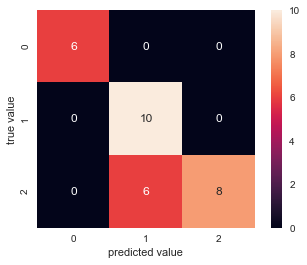

In [40]:
sns.heatmap(cm,square=True,annot=True,cbar=True)
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.show()

### Cross Validation

In [41]:
y=y.values.reshape(y.size,)
score=cross_val_score(model,X,y,cv=10)

In [42]:
score

array([0.93333333, 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.93333333, 0.86666667, 1.        , 1.        , 1.        ])

In [43]:
score.mean()

0.9533333333333334

C:\Users\Public\Programming\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


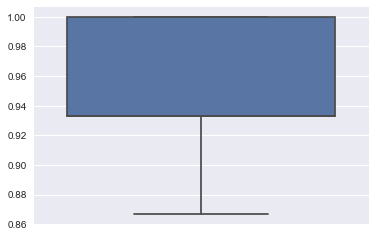

In [44]:
sns.boxplot(x=score,orient='v')
plt.show()

# EXTRAS

In [45]:
dataset=dataset[input_headers+target_header]

In [46]:
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
!pip list

In [47]:
classes

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']